## Notebook desenvolvido para exemplificar o uso da correlação entre o Gradiente Total e o Gradiente Vertical

In [47]:
import numpy
from matplotlib import pyplot
from codes.auxiliars import rotation_z

In [48]:
# Define area e numero de pontos
nx, ny = 80, 80
area = [-3000., 3000., -3000., 3000.]

In [49]:
from codes.grids import regular_grid

In [50]:
xp, yp, zp = regular_grid(area, (nx, ny), -100.)

In [51]:
xyzp = numpy.vstack([xp, yp, zp]).T
rotxyz = numpy.zeros_like(xyzp)

In [52]:
for k, i in enumerate(xyzp):
    rotxyz[k,:] = numpy.dot(rotation_z(45.), i)

In [53]:
xo = rotxyz[:,0]
yo = rotxyz[:,1]
zo = rotxyz[:,2]

In [54]:
from codes.prism import prism_tf
from codes.plot import draw_prism

In [55]:
modelo1 = [-1500., 1500., -500., 500., 200., 300., 1.]

In [56]:
tf = prism_tf(xo, yo, zo, modelo1, -20., 59.)
rtp = prism_tf(xo, yo, zo, modelo1, 90., 0.)

In [57]:
xp = xp.reshape((nx,ny))
yp = yp.reshape((nx,ny))
tf = tf.reshape((nx,ny))
rtp = rtp.reshape((nx,ny))

In [58]:
from codes.derivative import zderiv, totalgrad
from codes.filtering import reduction

In [59]:
gt = totalgrad(xp, yp, tf)
gv = zderiv(xp, yp, tf)

In [60]:
#rtp = reduction(xp, yp, tf, 45., -40.)

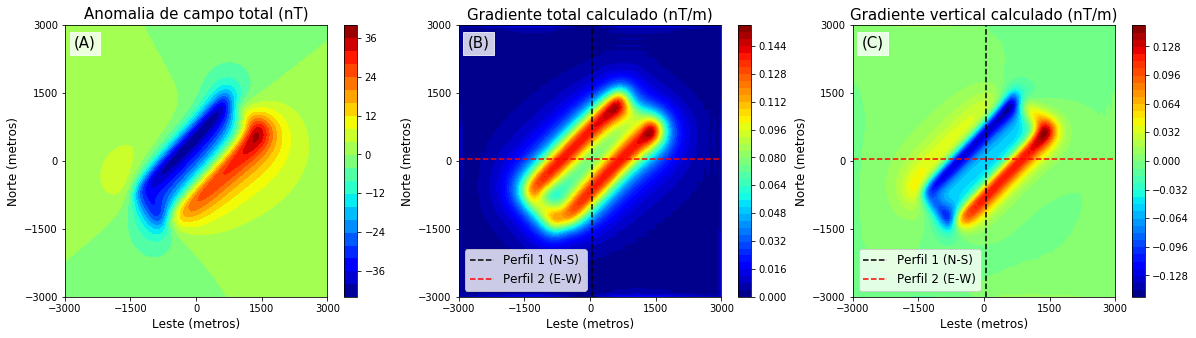

In [61]:
pyplot.figure(figsize=(20,5))

pyplot.subplot(1,3,1)
pyplot.contourf(yp, xp, tf, 25, cmap = pyplot.cm.jet)
#draw_prism(newmodel, linewidth = 1., style = 'k.--' , label = 'Soleira', xy2ne = True)
pyplot.text(-2800., 2500., '(A)', fontsize = 15., bbox=dict(facecolor='white', edgecolor='w', alpha = 0.8))
pyplot.title('Anomalia de campo total (nT)', fontsize = 15)
pyplot.xlabel('Leste (metros)', fontsize = 12)
pyplot.ylabel('Norte (metros)', fontsize = 12)
pyplot.xticks(numpy.linspace(xp.min(), xp.max(), 5))
pyplot.yticks(numpy.linspace(yp.min(), yp.max(), 5))
#pyplot.legend(loc = 'lower center', fontsize = 'x-large')
pyplot.colorbar()

pyplot.subplot(1,3,2)
pyplot.contourf(yp, xp, gt, 40, cmap = pyplot.cm.jet)
pyplot.plot(yp[:,40], xp[:,40], 'k--', label = 'Perfil 1 (N-S)')
pyplot.plot(yp[40,:], xp[40,:], 'r--', label = 'Perfil 2 (E-W)')
pyplot.text(-2800., 2500., '(B)', fontsize = 15., bbox=dict(facecolor='white', edgecolor='w', alpha = 0.8))
pyplot.title('Gradiente total calculado (nT/m)', fontsize = 15)
pyplot.xlabel('Leste (metros)', fontsize = 12)
pyplot.ylabel('Norte (metros)', fontsize = 12)
pyplot.xticks(numpy.linspace(xp.min(), xp.max(), 5))
pyplot.yticks(numpy.linspace(yp.min(), yp.max(), 5))
pyplot.legend(loc = 'lower left', fontsize = 'large')
pyplot.colorbar()

pyplot.subplot(1,3,3)
pyplot.contourf(yp, xp, gv, 40, cmap = pyplot.cm.jet)
pyplot.plot(yp[:,40], xp[:,40], 'k--', label = 'Perfil 1 (N-S)')
pyplot.plot(yp[40,:], xp[40,:], 'r--', label = 'Perfil 2 (E-W)')
pyplot.text(-2800., 2500., '(C)', fontsize = 15., bbox=dict(facecolor='white', edgecolor='w', alpha = 0.8))
pyplot.title('Gradiente vertical calculado (nT/m)', fontsize = 15)
pyplot.xlabel('Leste (metros)', fontsize = 12)
pyplot.ylabel('Norte (metros)', fontsize = 12)
pyplot.xticks(numpy.linspace(xp.min(), xp.max(), 5))
pyplot.yticks(numpy.linspace(yp.min(), yp.max(), 5))
pyplot.legend(loc = 'lower left', fontsize = 'large')
pyplot.colorbar()

pyplot.savefig('figs-seminario2018/justificativa1.png', dpi = 300, bbox_inches = 'tight')
pyplot.show()

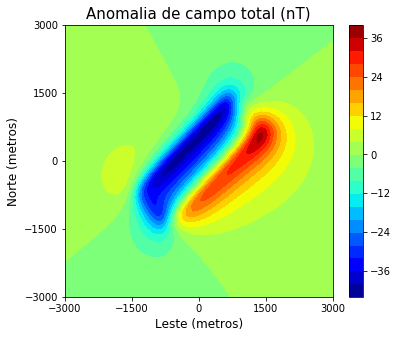

In [62]:
pyplot.figure(figsize=(6, 5))
pyplot.contourf(yp, xp, tf, 25, cmap = pyplot.cm.jet)
#draw_prism(modelo1[:4], linewidth = 1., style = 'k.--' , label = 'Soleira', xy2ne = True)
pyplot.title('Anomalia de campo total (nT)', fontsize = 15)
pyplot.xlabel('Leste (metros)', fontsize = 12)
pyplot.ylabel('Norte (metros)', fontsize = 12)
pyplot.xticks(numpy.linspace(xp.min(), xp.max(), 5))
pyplot.yticks(numpy.linspace(yp.min(), yp.max(), 5))
#pyplot.legend(loc = 'lower center', fontsize = 'x-large')
pyplot.colorbar()
pyplot.savefig('figs-seminario2018/justificativa0.png', dpi = 300, bbox_inches = 'tight')
pyplot.show()

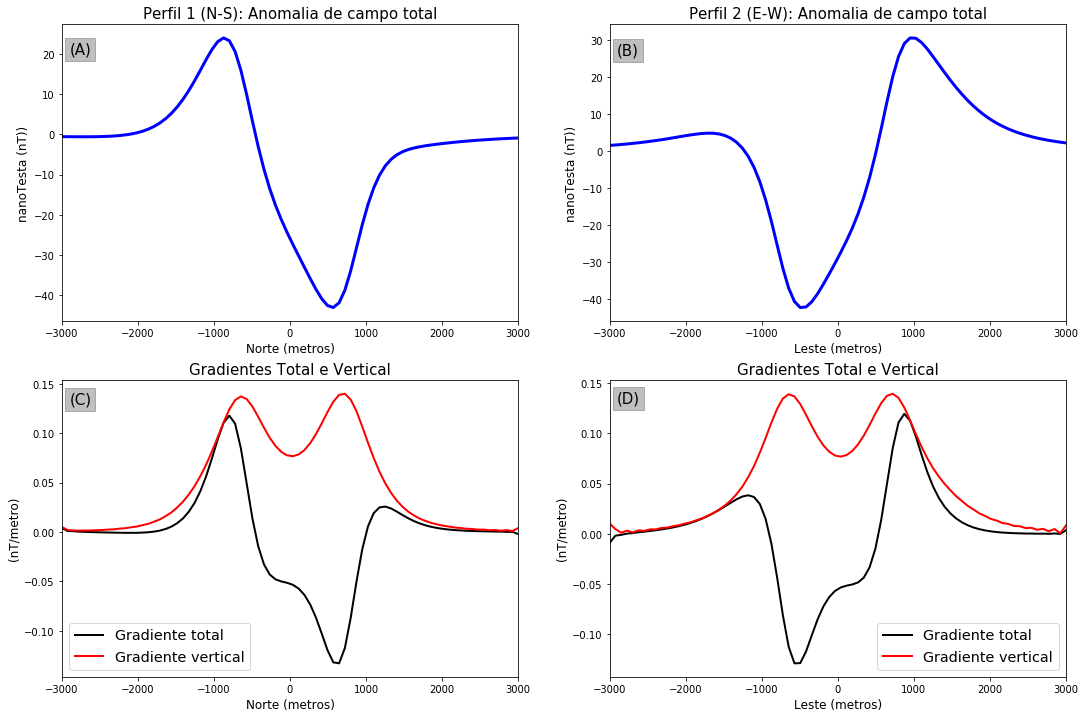

In [71]:
pyplot.figure(figsize=(18, 12))

pyplot.subplot(2,2,1)
pyplot.plot(xp[:,40], tf[:,40], 'b-', linewidth = 3)
pyplot.text(-2900., 20., '(A)', fontsize = 15., bbox=dict(facecolor='black', edgecolor='k', alpha = 0.25))
pyplot.title('Perfil 1 (N-S): Anomalia de campo total', fontsize = 15)
pyplot.xlabel('Norte (metros)', fontsize = 12)
pyplot.ylabel('nanoTesta (nT))', fontsize = 12)
#pyplot.xticks(numpy.linspace(xp.min(), xp.max(), 5))
#pyplot.yticks(numpy.linspace(tf[:,44].min(), tf[:,44].max(), 5) , fontsize = 10)
pyplot.xlim(xp.min(), xp.max())

pyplot.subplot(2,2,3)
pyplot.plot(xp[:,40], gv[:,40], 'k-', linewidth = 2, label = 'Gradiente total')
pyplot.plot(xp[:,40], gt[:,40], 'r-', linewidth = 2, label = 'Gradiente vertical')
pyplot.text(-2900., 0.13, '(C)', fontsize = 15., bbox=dict(facecolor='black', edgecolor='k', alpha = 0.25))
pyplot.title('Gradientes Total e Vertical', fontsize = 15)
pyplot.xlabel('Norte (metros)', fontsize = 12)
pyplot.ylabel('(nT/metro)', fontsize = 12)
#pyplot.xticks(numpy.linspace(xp.min(), xp.max(), 5))
#pyplot.yticks(fontsize = 10)
pyplot.xlim(xp.min(), xp.max())
pyplot.legend(loc = 'lower left', fontsize = 'x-large')

pyplot.subplot(2,2,2)
pyplot.plot(yp[40,:], tf[40,:], 'b-', linewidth = 3)
pyplot.text(-2900., 26., '(B)', fontsize = 15., bbox=dict(facecolor='black', edgecolor='k', alpha = 0.25))
pyplot.title('Perfil 2 (E-W): Anomalia de campo total', fontsize = 15)
pyplot.xlabel('Leste (metros)', fontsize = 12)
pyplot.ylabel('nanoTesta (nT))', fontsize = 12)
#pyplot.xticks(numpy.linspace(xp.min(), xp.max(), 5)
#pyplot.yticks(numpy.linspace(tf[33,:].min(), tf[33,:].max(), 5), fontsize = 10)
pyplot.xlim(xp.min(), xp.max())

pyplot.subplot(2,2,4)
pyplot.plot(yp[40,:], gv[40,:], 'k-', linewidth = 2, label = 'Gradiente total')
pyplot.plot(yp[40,:], gt[40,:], 'r-', linewidth = 2, label = 'Gradiente vertical')
pyplot.text(-2900., 0.13, '(D)', fontsize = 15., bbox=dict(facecolor='black', edgecolor='k', alpha = 0.25))
pyplot.title('Gradientes Total e Vertical', fontsize = 15)
pyplot.xlabel('Leste (metros)', fontsize = 12)
pyplot.ylabel('(nT/metro)', fontsize = 12)
#pyplot.xticks(numpy.linspace(xp.min(), xp.max(), 5), fontsize = 10)
#pyplot.yticks(fontsize = 10)
pyplot.xlim(xp.min(), xp.max())
pyplot.legend(loc = 'lower right', fontsize = 'x-large')

pyplot.savefig('figs-seminario2018/justificativa2-anomalia.png', dpi = 300, bbox_inches = 'tight')
pyplot.show()

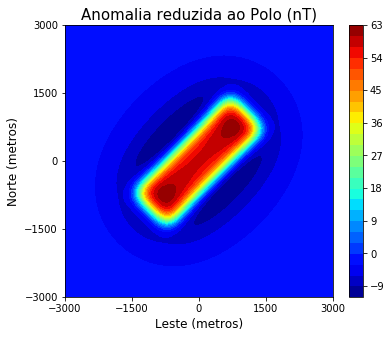

In [64]:
pyplot.figure(figsize=(6, 5))
pyplot.contourf(yp, xp, rtp, 25, cmap = pyplot.cm.jet)
#draw_prism(modelo1[:4], linewidth = 1., style = 'k.--' , label = 'Soleira', xy2ne = True)
pyplot.title('Anomalia reduzida ao Polo (nT)', fontsize = 15)
pyplot.xlabel('Leste (metros)', fontsize = 12)
pyplot.ylabel('Norte (metros)', fontsize = 12)
pyplot.xticks(numpy.linspace(xp.min(), xp.max(), 5))
pyplot.yticks(numpy.linspace(yp.min(), yp.max(), 5))
#pyplot.legend(loc = 'lower center', fontsize = 'x-large')
pyplot.colorbar()
pyplot.savefig('figs-seminario2018/justificativa0-rtp.png', dpi = 300, bbox_inches = 'tight')
pyplot.show()

In [33]:
gt = totalgrad(xp, yp, rtp)
gv = zderiv(xp, yp, rtp)

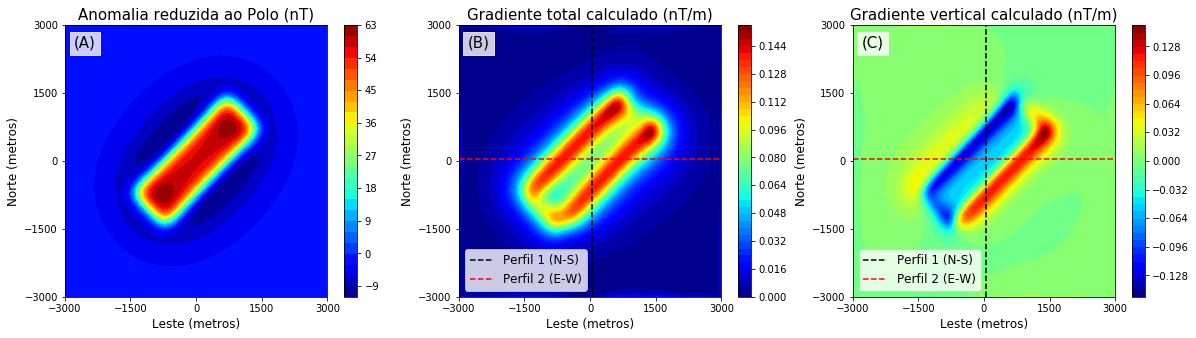

In [72]:
pyplot.figure(figsize=(20,5))

pyplot.subplot(1,3,1)
pyplot.contourf(yp, xp, rtp, 25, cmap = pyplot.cm.jet)
#draw_prism(modelo1[:4], linewidth = 1., style = 'k.--' , label = 'Soleira', xy2ne = True)
pyplot.text(-2800., 2500., '(A)', fontsize = 15., bbox=dict(facecolor='white', edgecolor='w', alpha = 0.8))
pyplot.title('Anomalia reduzida ao Polo (nT)', fontsize = 15)
pyplot.xlabel('Leste (metros)', fontsize = 12)
pyplot.ylabel('Norte (metros)', fontsize = 12)
pyplot.xticks(numpy.linspace(xp.min(), xp.max(), 5))
pyplot.yticks(numpy.linspace(yp.min(), yp.max(), 5))
#pyplot.legend(loc = 'lower center', fontsize = 'x-large')
pyplot.colorbar()

pyplot.subplot(1,3,2)
pyplot.contourf(yp, xp, gt, 40, cmap = pyplot.cm.jet)
pyplot.plot(yp[:,40], xp[:,40], 'k--', label = 'Perfil 1 (N-S)')
pyplot.plot(yp[40,:], xp[40,:], 'r--', label = 'Perfil 2 (E-W)')
pyplot.text(-2800., 2500., '(B)', fontsize = 15., bbox=dict(facecolor='white', edgecolor='w', alpha = 0.8))
pyplot.title('Gradiente total calculado (nT/m)', fontsize = 15)
pyplot.xlabel('Leste (metros)', fontsize = 12)
pyplot.ylabel('Norte (metros)', fontsize = 12)
pyplot.xticks(numpy.linspace(xp.min(), xp.max(), 5))
pyplot.yticks(numpy.linspace(yp.min(), yp.max(), 5))
pyplot.legend(loc = 'lower left', fontsize = 'large')
pyplot.colorbar()

pyplot.subplot(1,3,3)
pyplot.contourf(yp, xp, gv, 40, cmap = pyplot.cm.jet)
pyplot.plot(yp[:,40], xp[:,40], 'k--', label = 'Perfil 1 (N-S)')
pyplot.plot(yp[40,:], xp[40,:], 'r--', label = 'Perfil 2 (E-W)')
pyplot.text(-2800., 2500., '(C)', fontsize = 15., bbox=dict(facecolor='white', edgecolor='w', alpha = 0.8))
pyplot.title('Gradiente vertical calculado (nT/m)', fontsize = 15)
pyplot.xlabel('Leste (metros)', fontsize = 12)
pyplot.ylabel('Norte (metros)', fontsize = 12)
pyplot.xticks(numpy.linspace(xp.min(), xp.max(), 5))
pyplot.yticks(numpy.linspace(yp.min(), yp.max(), 5))
pyplot.legend(loc = 'lower left', fontsize = 'large')
pyplot.colorbar()

pyplot.savefig('figs-seminario2018/justificativa1-rtp.png', dpi = 300, bbox_inches = 'tight')
pyplot.show()

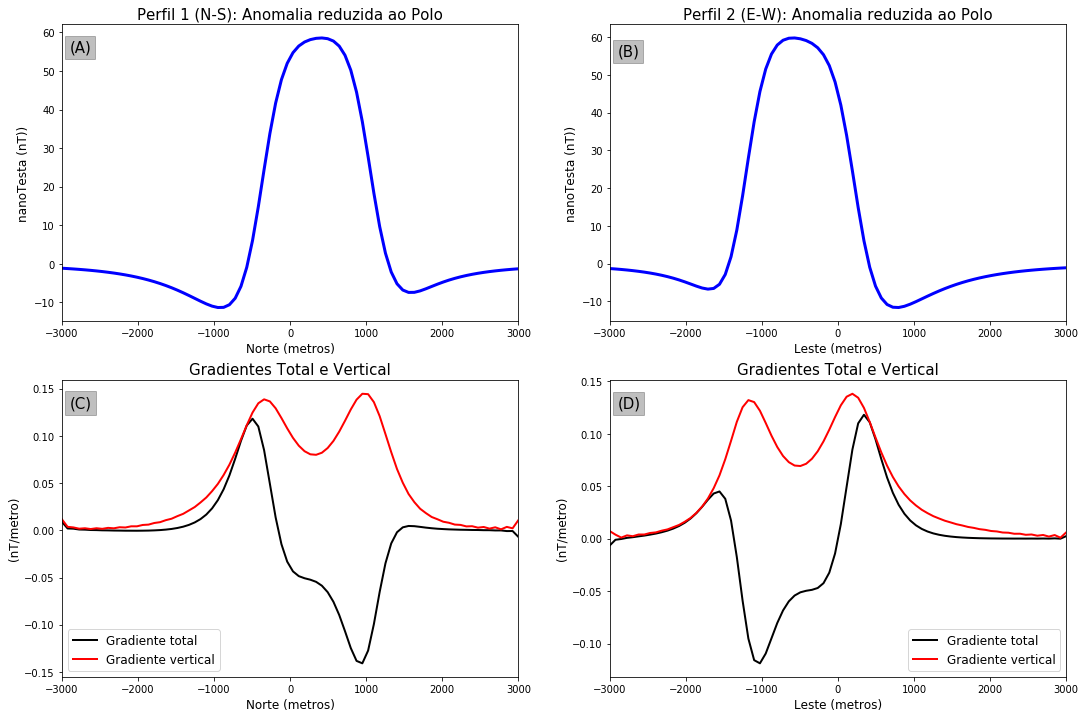

In [78]:
pyplot.figure(figsize=(18, 12))

pyplot.subplot(2,2,1)
pyplot.plot(xp[:,44], rtp[:,44], 'b-', linewidth = 3)
pyplot.text(-2900., 55., '(A)', fontsize = 15., bbox=dict(facecolor='black', edgecolor='k', alpha = 0.25))
pyplot.title('Perfil 1 (N-S): Anomalia reduzida ao Polo', fontsize = 15)
pyplot.xlabel('Norte (metros)', fontsize = 12)
pyplot.ylabel('nanoTesta (nT))', fontsize = 12)
#pyplot.xticks(numpy.linspace(xp.min(), xp.max(), 5))
#pyplot.yticks(numpy.linspace(tf[:,44].min(), tf[:,44].max(), 5) , fontsize = 10)
pyplot.xlim(xp.min(), xp.max())

pyplot.subplot(2,2,3)
pyplot.plot(xp[:,44], gv[:,44], 'k-', linewidth = 2, label = 'Gradiente total')
pyplot.plot(xp[:,44], gt[:,44], 'r-', linewidth = 2, label = 'Gradiente vertical')
pyplot.text(-2900., 0.13, '(C)', fontsize = 15., bbox=dict(facecolor='black', edgecolor='k', alpha = 0.25))
pyplot.title('Gradientes Total e Vertical', fontsize = 15)
pyplot.xlabel('Norte (metros)', fontsize = 12)
pyplot.ylabel('(nT/metro)', fontsize = 12)
#pyplot.xticks(numpy.linspace(xp.min(), xp.max(), 5))
#pyplot.yticks(fontsize = 10)
pyplot.xlim(xp.min(), xp.max())
pyplot.legend(loc = 'lower left', fontsize = 'large')

pyplot.subplot(2,2,2)
pyplot.plot(yp[33,:], rtp[33,:], 'b-', linewidth = 3)
pyplot.text(-2900., 55., '(B)', fontsize = 15., bbox=dict(facecolor='black', edgecolor='k', alpha = 0.25))
pyplot.title('Perfil 2 (E-W): Anomalia reduzida ao Polo', fontsize = 15)
pyplot.xlabel('Leste (metros)', fontsize = 12)
pyplot.ylabel('nanoTesta (nT))', fontsize = 12)
#pyplot.xticks(numpy.linspace(xp.min(), xp.max(), 5)
#pyplot.yticks(numpy.linspace(tf[33,:].min(), tf[33,:].max(), 5), fontsize = 10)
pyplot.xlim(xp.min(), xp.max())

pyplot.subplot(2,2,4)
pyplot.plot(yp[33,:], gv[33,:], 'k-', linewidth = 2, label = 'Gradiente total')
pyplot.plot(yp[33,:], gt[33,:], 'r-', linewidth = 2, label = 'Gradiente vertical')
pyplot.text(-2900., 0.125, '(D)', fontsize = 15., bbox=dict(facecolor='black', edgecolor='k', alpha = 0.25))
pyplot.title('Gradientes Total e Vertical', fontsize = 15)
pyplot.xlabel('Leste (metros)', fontsize = 12)
pyplot.ylabel('(nT/metro)', fontsize = 12)
#pyplot.xticks(numpy.linspace(xp.min(), xp.max(), 5), fontsize = 10)
#pyplot.yticks(fontsize = 10)
pyplot.xlim(xp.min(), xp.max())
pyplot.legend(loc = 'lower right', fontsize = 'large')

pyplot.savefig('figs-seminario2018/justificativa2-rtp.png', dpi = 300, bbox_inches = 'tight')
pyplot.show()